In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('CB-Insights_Global-Unicorn-Club_2021.xlsx')

In [3]:
del df['Unnamed: 0']
df.columns = df.iloc[1]
df = df.iloc[2:]
df

1,Company,Valuation ($B),Date Added,Country,Category,Select Investors
2,Bytedance,140,2017-04-07 00:00:00,China,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
3,Stripe,95,2014-01-23 00:00:00,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,SpaceX,74,2012-12-01 00:00:00,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
5,Klarna,45.6,2011-12-12 00:00:00,Sweden,Fintech,"Institutional Venture Partners, Sequoia Capita..."
6,Canva,40,2018-01-08 00:00:00,Australia,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...
845,PandaDoc,1,2021-09-22 00:00:00,United States,Internet software & services,"Rembrandt Venture Partners, M12, Altos Ventures"
846,Vedantu,1,2021-09-29 00:00:00,India,Edtech,"Accel, Tiger Global Management, Omidyar Network"
847,TrialSpark,1,2021-09-30 00:00:00,"United States,",Health,"Sequoia Capital, Thrive Capital, Sound Ventures"
848,HAYDON,1,9/242021,China,Consumer & retail,"Tencent Holdings, Hillhouse Capital Management"


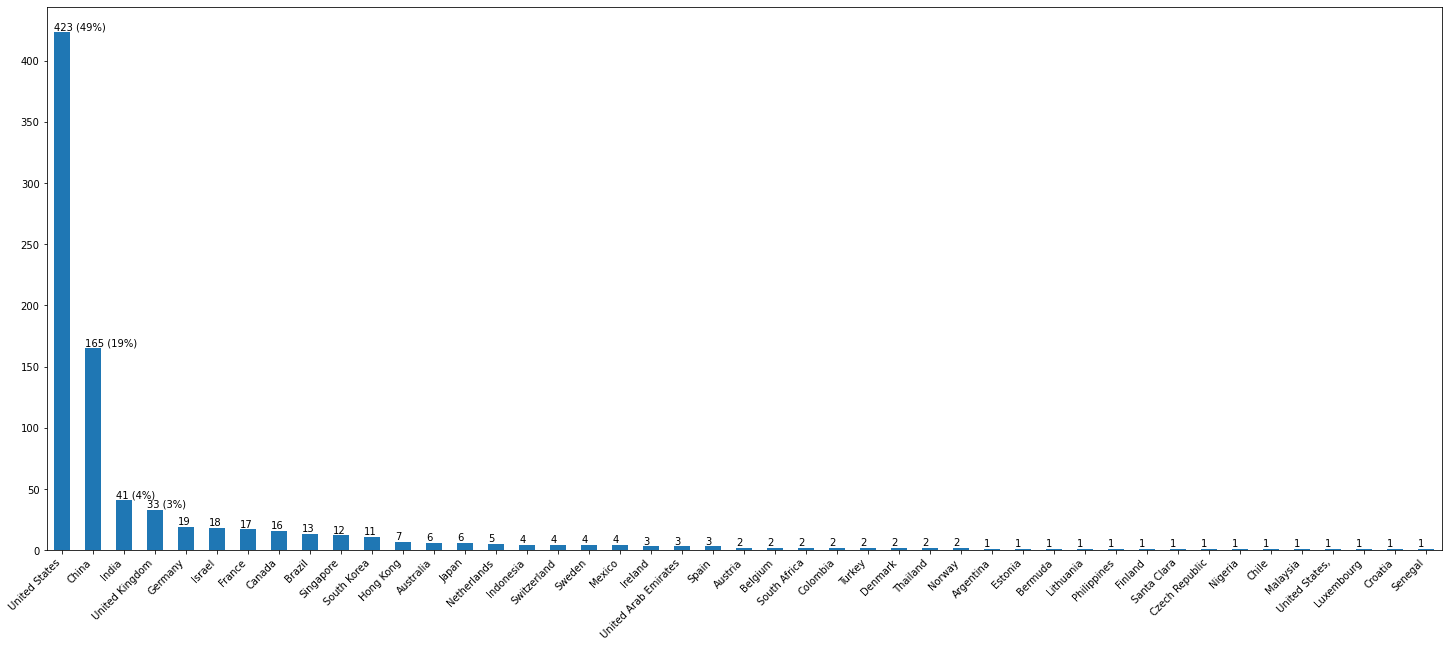

In [4]:
ax = df['Country'].value_counts().plot(kind='bar', figsize=(25,10))
sum = 0
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
for p in ax.patches:
  sum += p.get_height()
for i,p in enumerate(ax.patches):
    ax.annotate(str(p.get_height())+(' ('+str(int(100*p.get_height()/sum))+'%)')*(i<4), (p.get_x() , 2 + p.get_height()))

848


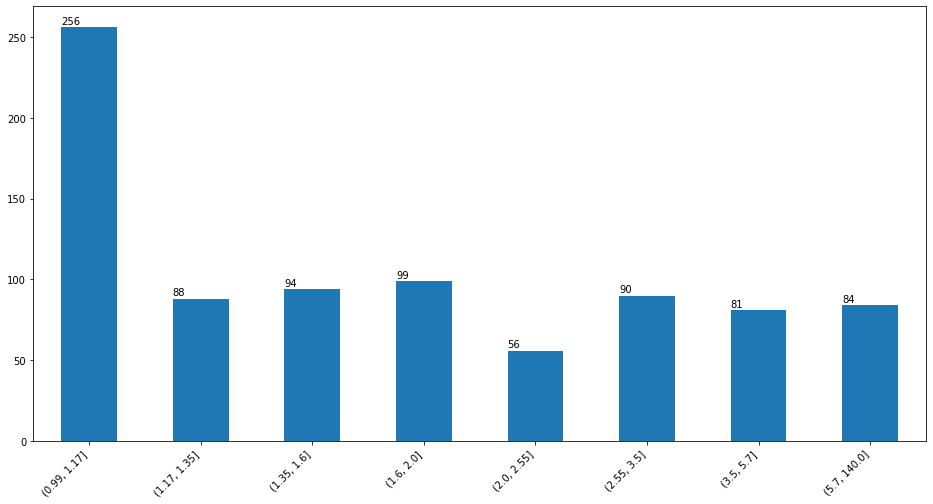

In [102]:
ax = pd.qcut(df['Valuation ($B) '],q=10, duplicates='drop',precision=2).value_counts(sort=False).plot(kind='bar',figsize=(16,8))
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
sum = 0
for p in ax.patches:
    sum += p.get_height()
    ax.annotate(str(p.get_height()), (p.get_x() , 2+ p.get_height()))
print(sum)

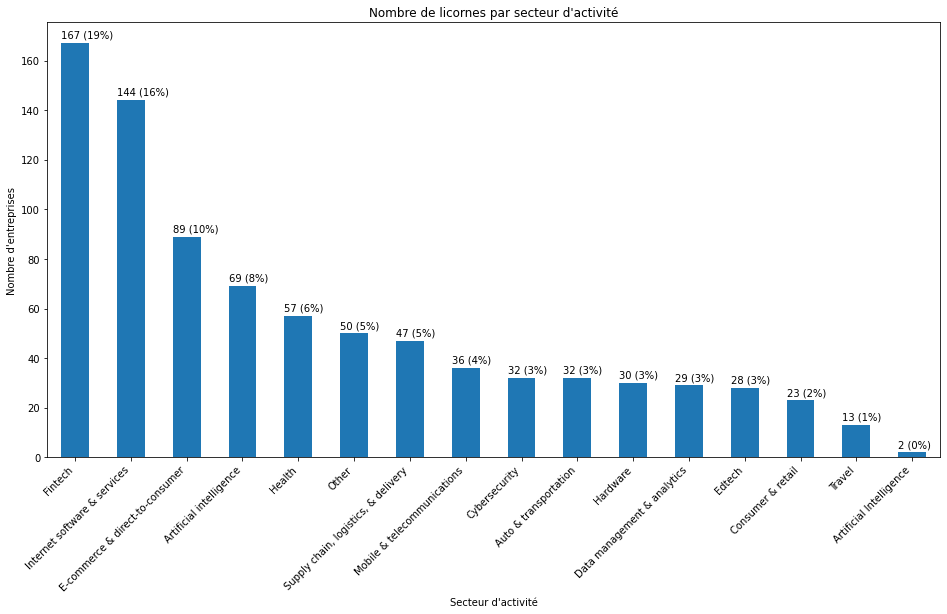

In [6]:
ax = df['Category'].value_counts().plot(kind='bar', figsize=(16,8),xlabel = "Secteur d'activité", ylabel = "Nombre d'entreprises", title = "Nombre de licornes par secteur d'activité")
sum = 0
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
for p in ax.patches:
  sum += p.get_height()
for p in ax.patches:
    ax.annotate(str(p.get_height())+' ('+str(int(100*p.get_height()/sum))+'%)', (p.get_x() , 2+ p.get_height()))

In [24]:
import requests 
def get_patents(Company):
  url = 'https://patft.uspto.gov/netacgi/nph-Parser?Sect1=PTO2&Sect2=HITOFF&p=1&u=%2Fnetahtml%2FPTO%2Fsearch-bool.html&r=0&f=S&l=50&TERM1='+Company+'&FIELD1=ASNM&co1=AND&TERM2=&FIELD2=&d=PTXT'
  headers = { "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,/;q=0.8", "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15" }
  response = requests.get(url, headers=headers)
  text = response.text
  idx = text.find('</strong> out of <strong>') + 25
  if idx == 24: return 0
  nb_patents = str(text[idx])
  while nb_patents.isdecimal():
    idx +=1
    nb_patents += text[idx]
  print(nb_patents[:-1])
  return(int(nb_patents[:-1]))

In [ ]:
from tqdm.auto import tqdm
tqdm.pandas(desc="my bar!")
df['Patents'] = df['Company'].progress_apply(get_patents)
df

In [96]:
df_us.loc[df['Patents']==0]

1,Company,Valuation ($B),Date Added,Country,Category,Select Investors,Patents
4,SpaceX,74,2012-12-01 00:00:00,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",0
7,Instacart,39,2014-12-30 00:00:00,United States,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",0
22,goPuff,15,2020-10-08 00:00:00,United States,E-commerce & direct-to-consumer,"Accel, Softbank Group, Anthos Capital",0
34,reddit,10,2017-07-31 00:00:00,United States,Internet software & services,"Y Combinator, Sequoia Capital, Coatue Management",0
41,ServiceTitan,9.5,2018-11-14 00:00:00,United States,Internet software & services,"Bessemer Venture Partners, ICONIQ Capital, Bat...",0
...,...,...,...,...,...,...,...
832,Maven Clinic,1,2021-08-17 00:00:00,United States,Health,"Female Founders Fund, Oak HC/FT Partners, Sequ...",0
833,Shield AI,1,2021-08-24 00:00:00,United States,Artificial intelligence,"Andreessen Horowitz, Homebrew, Point72 Ventures",0
834,PicsArt,1,2021-08-26 00:00:00,United States,Mobile & telecommunications,"Sequoia Capital, DCM Ventures, Insight Partners",0
839,Mammoth Biosciences,1,2021-09-09 00:00:00,United States,Health,"NFX, Plum Alley, Mayfield",0


In [56]:
df_us = df.loc[df['Country']=='United States']
df_us

1,Company,Valuation ($B),Date Added,Country,Category,Select Investors,Patents
3,Stripe,95,2014-01-23 00:00:00,United States,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",45
4,SpaceX,74,2012-12-01 00:00:00,United States,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",0
7,Instacart,39,2014-12-30 00:00:00,United States,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",0
8,Databricks,38,2019-02-05 00:00:00,United States,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",19
11,Epic Games,28.7,2018-10-26 00:00:00,United States,Other,"Tencent Holdings, KKR, Smash Ventures",13
...,...,...,...,...,...,...,...
834,PicsArt,1,2021-08-26 00:00:00,United States,Mobile & telecommunications,"Sequoia Capital, DCM Ventures, Insight Partners",0
839,Mammoth Biosciences,1,2021-09-09 00:00:00,United States,Health,"NFX, Plum Alley, Mayfield",0
840,Orchard,1,2021-09-09 00:00:00,United States,Fintech,"Accomplice, Juxtapose, FirstMark Capital",34
844,Assembly,1,2021-09-21 00:00:00,United States,Internet software & services,"Advent International, PSG, Providence Equity P...",541


1                        Valuation ($B) 
Category                                
Artificial Intelligence             2.70
Artificial intelligence           301.14
Auto & transportation             135.46
Consumer & retail                  64.73
Cybersecurity                      78.34
1                        Valuation ($B) 
Category                                
Artificial Intelligence         0.098238
Artificial intelligence        10.956801
Auto & transportation           4.928632
Consumer & retail               2.355163
Cybersecurity                   2.850355


Text(0, 0.5, '% of Patents')

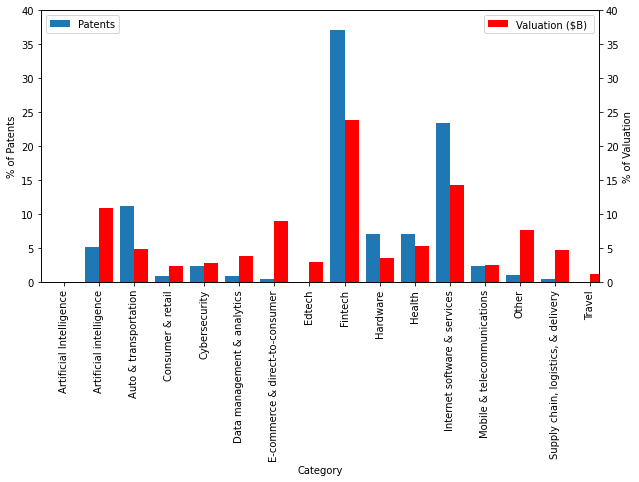

In [76]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

df_val = df[['Valuation ($B) ', 'Category']].groupby('Category').sum()
df_pat = df[['Patents', 'Category']].groupby('Category').sum()
df_val['Valuation ($B) '] = df_val['Valuation ($B) '].div(df_val['Valuation ($B) '].sum()).multiply(100)
df_pat['Patents'] = df_pat['Patents'].div(df_pat['Patents'].sum()).multiply(100)

df_val.plot(kind='bar', color='red', position = 0,width = 0.4, ax=ax2, ylim=(0,40)).legend(loc=1)
df_pat.plot(kind='bar', position = 1, width = 0.4, ax=ax,ylim=(0,40)).legend(loc=2)
ax2.set_ylabel('% of Valuation')
ax.set_ylabel('% of Patents')

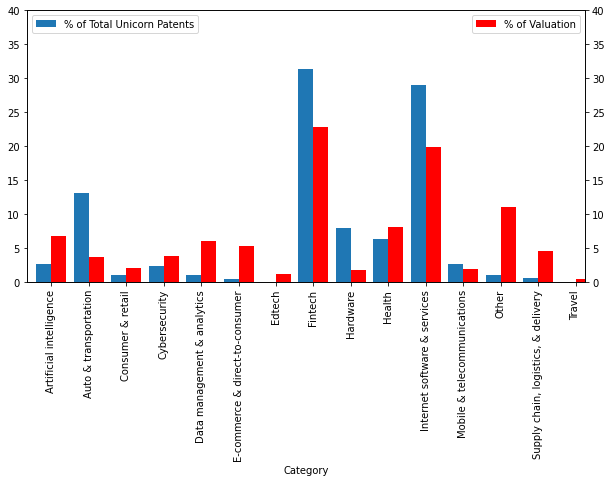

In [81]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

df_val = df_us[['Valuation ($B) ', 'Category']].groupby('Category').sum()
df_pat = df_us[['Patents', 'Category']].groupby('Category').sum()
df_val['Valuation ($B) '] = df_val['Valuation ($B) '].div(df_val['Valuation ($B) '].sum()).multiply(100)
df_pat['Patents'] = df_pat['Patents'].div(df_pat['Patents'].sum()).multiply(100)

df_val.plot(kind='bar', color='red', position = 0,width = 0.4, ax=ax2, ylim=(0,40))
df_pat.plot(kind='bar', position = 1, width = 0.4, ax=ax,ylim=(0,40))
ax2.legend(['% of Valuation'])
ax.legend(['% of Total Unicorn Patents'], loc='upper left')

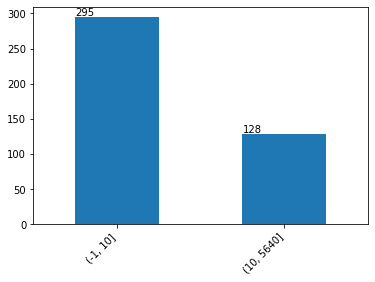

In [100]:
ax = pd.cut(df_us['Patents'],bins=[-1,10,5640], duplicates='drop').value_counts(sort=False).plot(kind='bar')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
sum = 0
for p in ax.patches:
    sum += p.get_height()
    ax.annotate(str(p.get_height()), (p.get_x() , 2+ p.get_height()))

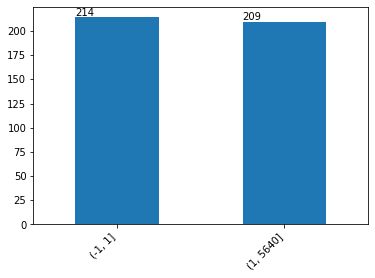

In [101]:
ax = pd.cut(df_us['Patents'],bins=[-1,1,5640], duplicates='drop').value_counts(sort=False).plot(kind='bar')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
sum = 0
for p in ax.patches:
    sum += p.get_height()
    ax.annotate(str(p.get_height()), (p.get_x() , 2+ p.get_height()))